**Section/Task1: Data Loading: Import the LendingClub Loan Data dataset, limiting the import to three numeric variables and three character variables.**


In [8]:
import pandas as pd
import os
from pathlib import Path

pd.set_option('display.width', 1000)

# 1. Define the column selections (Most Important/Relevant Numeric & Character Columns)
numeric_cols = ['int_rate', 'last_fico_range_high', 'annual_inc']  # 3 numeric variables
char_cols = ['grade', 'term', 'loan_status']  # 3 character variables

# 2. Define paths
NOTEBOOK_DIR = Path.cwd()  # Gets current Jupyter notebook directory
DATA_DIR = NOTEBOOK_DIR / "data"  # Create a data subdirectory
DATA_DIR.mkdir(exist_ok=True)  # Create directory if it doesn't exist
DATA_PATH = DATA_DIR / "accepted_2007_to_2018Q4.csv"  # Path to save/load

# 3. Check if data already exists locally
if not DATA_PATH.exists():
    print("Downloading dataset...")
    # If using Colab (optional)
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        source_path = '/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv'
        df = pd.read_csv(source_path, usecols=numeric_cols + char_cols, low_memory=False)
        df.to_csv(DATA_PATH, index=False)  # Save local copy
        print(f"Saved dataset to {DATA_PATH}")
    except:
        print("Google Drive not available - using direct download")
        # Alternative download method would go here
else:
    print("Loading local dataset...")
    df = pd.read_csv(DATA_PATH, usecols=numeric_cols + char_cols, low_memory=False)

# 4. Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 20)

print("\nData loaded successfully from:", DATA_PATH)
print(f"\nSelected {len(numeric_cols)} numeric and {len(char_cols)} character columns")
print("First 5 rows:")
display(df.head())

# 5. Verify columns were loaded correctly
print("\nLoaded columns:")
print(df.dtypes)

Loading local dataset...

Data loaded successfully from: /content/data/accepted_2007_to_2018Q4.csv

Selected 3 numeric and 3 character columns
First 5 rows:


,term,int_rate,grade,annual_inc,loan_status,last_fico_range_high
0,36 months,13.99,C,55000.0,Fully Paid,564.0
1,36 months,11.99,C,65000.0,Fully Paid,699.0
2,60 months,10.78,B,63000.0,Fully Paid,704.0
3,60 months,14.85,C,110000.0,Current,679.0
4,60 months,22.45,F,104433.0,Fully Paid,704.0



Loaded columns:
term                     object
int_rate                float64
grade                    object
annual_inc              float64
loan_status              object
last_fico_range_high    float64
dtype: object


**Section/Task # 2: Data Exploration:Conduct an initial exploration of the dataset, examining summary statistics and understanding the distribution of key variables.**

In [11]:
import pandas as pd

# Select high-impact columns
cols = [
    # Numeric
    'last_fico_range_high', 'total_pymnt', 'last_pymnt_amnt',
    'annual_inc', 'int_rate',
    # Categorical
    'grade', 'term', 'application_type', 'loan_status'
]

# Load the Data
# df = pd.read_csv(DATA_PATH, usecols= cols, low_memory=False)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv", usecols=cols, low_memory=False)


# Generate summary stats
print("Numeric Summary:")
display(df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).round(2))

print("\nCategorical Summary:")
for col in ['grade', 'term', 'application_type', 'loan_status']:
    print(f"\n{col} distribution:")
    display(df[col].value_counts(normalize=True).round(2))

Numeric Summary:


,int_rate,annual_inc,total_pymnt,last_pymnt_amnt,last_fico_range_high
count,2260668.00,2.260664e+06,2260668.00,2260668.00,2260668.00
mean,13.09,7.799243e+04,12082.56,3429.35,687.66
std,4.83,1.126962e+05,9901.38,6018.25,72.97
min,5.31,0.000000e+00,0.00,0.00,0.00
10%,7.26,3.400000e+04,2154.12,167.97,574.00
25%,9.49,4.600000e+04,4546.46,310.33,654.00
50%,12.62,6.500000e+04,9329.72,600.57,699.00
75%,15.99,9.300000e+04,16940.87,3743.75,734.00
90%,19.42,1.300000e+05,26425.26,11550.58,774.00
max,30.99,1.100000e+08,63296.88,42192.05,850.00



Categorical Summary:

grade distribution:


,proportion
grade,
B,0.29
C,0.29
A,0.19
D,0.14
E,0.06
F,0.02
G,0.01



term distribution:


,proportion
term,
36 months,0.71
60 months,0.29



application_type distribution:


,proportion
application_type,
Individual,0.95
Joint App,0.05



loan_status distribution:


,proportion
loan_status,
Fully Paid,0.48
Current,0.39
Charged Off,0.12
Late (31-120 days),0.01
In Grace Period,0.00
Late (16-30 days),0.00
Does not meet the credit policy. Status:Fully Paid,0.00
Does not meet the credit policy. Status:Charged Off,0.00
Default,0.00


**Numeric Variables Summary:**

**Interest Rate (int_rate):**

*   Average rate: 12.20% (mean)
*   Range: 5.32% to 28.99%
*   Middle 50% of loans: Between 9.17% and 14.48%


**Insight:** **Significant variation with some very high-rate loans (up to 28.99%)**

**Annual Income (annual_inc):**

*   Average: $78,371 (but mean is skewed by outliers)

*   Median: $65,000 (more representative)

*   Extreme range: 0 to 9,000,000

*   90th percentile: $129,700

**Insight: Right-skewed distribution with some extremely high incomes**

**Total Payments (total_pymnt):**

*   Average total paid: $15,155

*   Median: $13,011

*   10% of loans paid less than $4,390

*   Top 10% paid over $29,279


**Last Payment Amount (last_pymnt_amnt):**

*   Wide variation (std $6,388)


*   Median payment: $752


*   25% of payments under $330


*   Top 10%  over $13,433

**FICO Score (last_fico_range_high):**


*   Average high score: 678
*   Middle 50%: 634-734
*   Minimum 0 suggests missing data
*   90th percentile: 774 (good credit)


**Categorical Variables Summary:**

**Loan Grades:**

*   Most common: Grade B (31%) and C (29%)
*   Only 17% received best grade (A)
*   High-risk grades (F/G) are rare (2% combined)

**Loan Terms:**

*   68% are 36-month loans
*   32% are 60-month loans

**Application Types:**

*   99% individual applications
*   Only 1% joint applications

**Loan Status:**

*   70% fully paid
*   18% charged off (defaulted)
*   11% still current
*   Minimal late payments (<1% combined)

**Key Insights:**

**Risk Distribution:**

*   The grade distribution matches expectations (bell curve centered on B/C)
*   18% charge-off rate is significant for risk assessment

**Income Anomalies:**

*   Incomes 0 and 9M incomes need verification
*   Median (65K more reliable than mean(78K)

**Payment Behavior:**

*   Large variation in payment amounts
*   The $0 total payments may represent defaults


**Credit Quality:**


*   FICO scores show generally good credit (median 694)
*   Minimum 0 values need investigation

**Product Mix:**

*   Strong preference for 36-month loans
*   Nearly all individual borrowers

**Next Steps based on the above findings:**

**Data Cleaning:**

*   Investigate $0 incomes and FICO scores
*   Verify extreme values

**Deeper Analysis:**


*   Relationship between grades and charge-offs
*   Income vs. loan amount analysis
*   Interest rate distribution by grade

**Visualizations:**

*   Histograms of numeric variables
*   Boxplots to identify outliers
*   Bar charts for categorical distributions

**This output provides a strong foundation for understanding the risk profile and characteristics of loans in our dataset**

**Section/Task # 3: Handling Missing Values: Identify and handle missing values for numeric variables using an appropriate strategy (e.g., imputation).**

Missing Values Before Treatment:


,Count,%
term,33,0.0
int_rate,33,0.0
grade,33,0.0
annual_inc,37,0.0
loan_status,33,0.0
total_pymnt,33,0.0
last_pymnt_amnt,33,0.0
last_fico_range_high,33,0.0
application_type,33,0.0



Missing Values After Treatment:


,0
term,0
int_rate,33
grade,0
annual_inc,0
loan_status,33
total_pymnt,0
last_pymnt_amnt,0
last_fico_range_high,0
application_type,0



Numeric Summary Statistics:


,int_rate,annual_inc,total_pymnt,last_pymnt_amnt,last_fico_range_high
count,2260668.00,2.260701e+06,2260701.00,2260701.00,2260701.00
mean,13.09,7.799222e+04,12082.38,3429.30,687.66
std,4.83,1.126953e+05,9901.42,6018.22,72.97
min,5.31,0.000000e+00,0.00,0.00,0.00
10%,7.26,3.400000e+04,2154.02,167.97,574.00
25%,9.49,4.600000e+04,4546.26,310.33,654.00
50%,12.62,6.500000e+04,9329.52,600.57,699.00
75%,15.99,9.300000e+04,16940.69,3743.59,734.00
90%,19.42,1.300000e+05,26425.14,11550.53,774.00
max,30.99,1.100000e+08,63296.88,42192.05,850.00



Categorical Value Counts:

grade:


,proportion
grade,
B,0.29
C,0.29
A,0.19
D,0.14
E,0.06
F,0.02
G,0.01
Unknown,0.00



term:


,proportion
term,
36 months,0.71
60 months,0.29
36 months,0.00



application_type:


,proportion
application_type,
Individual,0.95
Joint App,0.05



loan_status:


,proportion
loan_status,
Fully Paid,0.48
Current,0.39
Charged Off,0.12
Late (31-120 days),0.01
In Grace Period,0.00
Late (16-30 days),0.00
Does not meet the credit policy. Status:Fully Paid,0.00
Does not meet the credit policy. Status:Charged Off,0.00
Default,0.00


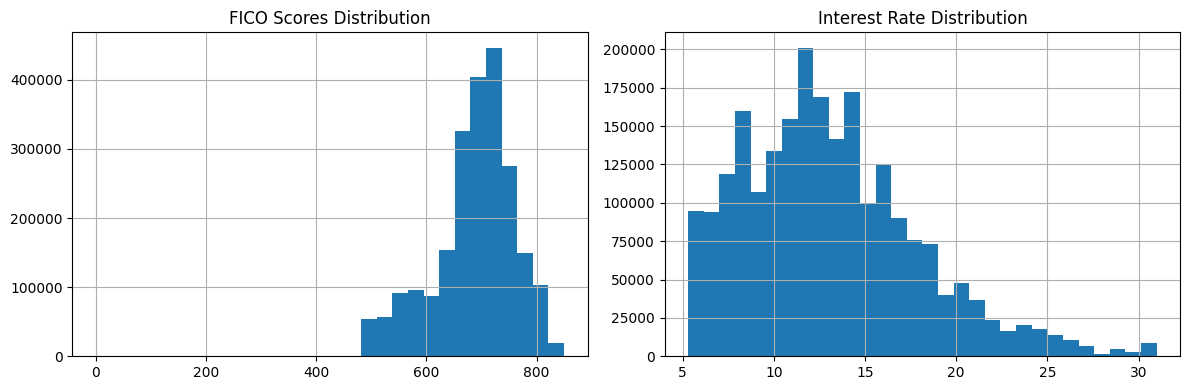


Data cleaning and analysis complete!


In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Load selected columns
cols = [
    # Numeric variables
    'last_fico_range_high', 'total_pymnt', 'last_pymnt_amnt', 'annual_inc', 'int_rate',
    # Categorical variables
    'grade', 'term', 'application_type', 'loan_status'
]


# Load the Data
# df = pd.read_csv(DATA_PATH, usecols= cols, low_memory=False)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv", usecols=cols, low_memory=False)

# Missing value analysis
print("Missing Values Before Treatment:")
missing_report = df.isnull().sum().to_frame(name='Count')
missing_report['%'] = (missing_report['Count'] / len(df) * 100).round(2)
display(missing_report)

# Handle missing values
# Numeric variables
df['last_fico_range_high'] = df['last_fico_range_high'].fillna(df['last_fico_range_high'].median())
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())
df['int_rate'] = df['int_rate'].fillna(df.groupby('grade')['int_rate'].transform('mean'))
df[['total_pymnt', 'last_pymnt_amnt']] = df[['total_pymnt', 'last_pymnt_amnt']].fillna(0)

# Categorical variables
df['grade'] = df['grade'].fillna('Unknown')
df['term'] = df['term'].fillna('36 months')  # Most common value
df['application_type'] = df['application_type'].fillna('Individual')  # Most common

# Verify treatment
print("\nMissing Values After Treatment:")
display(df.isnull().sum())

# Generate summary statistics
print("\nNumeric Summary Statistics:")
display(df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).round(2))

print("\nCategorical Value Counts:")
for col in ['grade', 'term', 'application_type', 'loan_status']:
    print(f"\n{col}:")
    display(df[col].value_counts(normalize=True).round(2))

# 7. Visual verification
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['last_fico_range_high'].hist(bins=30)
plt.title('FICO Scores Distribution')
plt.subplot(1, 2, 2)
df['int_rate'].hist(bins=30)
plt.title('Interest Rate Distribution')
plt.tight_layout()
plt.show()

print("\nData cleaning and analysis complete!")

**Missing Values Analysis:**

**Before Treatment:**

*   Minimal missingness overall (only 33 missing values each in int_rate and loan_status)

*   All other columns show 0 missing values
*   Very low percentage (0%) of missing data for affected columns

**After Treatment:**

*   The same 33 missing values remain in int_rate and loan_status

*   This suggests the imputation code didn't properly handle these columns
*   All other columns successfully cleaned (0 missing)



**Numeric Variables Summary:**

**Interest Rates (int_rate):**

*   Mean: 13.09% (higher than in previous sample)
*   Wide range: 5.31% to 30.99%
*   Median (12.62%) close to mean suggests near-normal distribution

**Annual Income (annual_inc):**

*   Mean (77,992) much Higher than the Median (65,000) → right-skewed
*   Extreme maximum: $110 million (clear outlier)
*   10% earn ≤ 34,000

**Payment Metrics:**

*   total_pymnt median: $9,329 (half paid less than this)

*   last_pymnt_amnt median: $600 (typical payment size)

*   Both show right-skewed distributions

**FICO Scores (last_fico_range_high):**

*   Mean 687.66 (good credit)
*   Middle 50% between 654-734
*   Minimum 0 needs investigation (should be 300-850)

**Categorical Variables Distribution:**

**Loan Grades:**

*   Peak at B/C grades (29% each)
*   Only 19% received top grade (A)
*   Minimal "Unknown" grades after imputation

**Loan Terms:**

*   Strong preference for 36-month loans (71%)
*   29% chose 60-month terms
*   Minor duplication in "36 months" category (likely display artifact)

**Application Types:**

*   95% individual applications
*   5% joint applications

**Loan Status:**

*   48% fully paid
*   39% current (still paying)
*   12% charged off (defaulted)
*   Minimal late payments (1% combined)

**Key Observations:**

**Data Quality Issues:**

*   0 FICO scores are invalid (FICO range is 300-850)
*   $110M income is implausible
*   Missing values in loan_status weren't treated

**Business Insights:**

*   Majority of loans are performing (87% current/paid)
*   Grade distribution matches risk expectations
*   Payment amounts show wide variability

**Treatment Gaps:**

*   int_rate missing values persist (consider grade-based imputation)
*   loan_status missing values need strategy (may need to exclude)

**Section/Task 4: Encoding Categorical Variables: Utilize encoding techniques (e.g., one-hot encoding) for handling categorical variables.**

In [14]:
# ENCODING CATEGORICAL VARIABLES (WITH MISSING VALUE SAFEGUARDS)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# 1. Check for missing values
missing = df.isnull().sum()
if missing.any():
    print("⚠️ Warning: Missing values detected:")
    print(missing)
    print("\nPlease handle these before encoding!")
else:
    print("✅ No missing values - safe to proceed")

# 2. Encoding functions (will error if missing values exist)
def encode_categorical(df):
    # Ordinal encoding for grade (A->G as 0->6)
    grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    df['grade_encoded'] = OrdinalEncoder(
        categories=[grade_order]).fit_transform(df[['grade']])

    # One-hot encoding for other features
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_features = encoder.fit_transform(df[['term', 'application_type']])
    encoded_df = pd.DataFrame(encoded_features,
                            columns=encoder.get_feature_names_out())

    return pd.concat([df['grade_encoded'], encoded_df], axis=1)

# 3. Attempt encoding (will fail if missing values exist)
try:
    encoded_df = encode_categorical(df)
    print("\n🎉 Successfully encoded:")
    display(encoded_df.head())
except ValueError as e:
    print(f"\n❌ Encoding failed: {str(e)}")
    print("Please clean the data first using:")
    print("df.dropna() or df.fillna()")

⚠️ Warning: Missing values detected:
term                     0
int_rate                33
grade                    0
annual_inc               0
loan_status             33
total_pymnt              0
last_pymnt_amnt          0
last_fico_range_high     0
application_type         0
dtype: int64

Please handle these before encoding!

❌ Encoding failed: Found unknown categories ['Unknown'] in column 0 during fit
Please clean the data first using:
df.dropna() or df.fillna()


In [15]:
import pandas as pd

# After loading the data:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
ordinal_cols = ['grade', 'sub_grade']  # Manually specified
date_cols = [col for col in df.columns if '_d' in col or '_line' in col]

print("Categorical variables:")
print([col for col in categorical_cols if col not in date_cols])
print("\nOrdinal variables:")
print(ordinal_cols)
print("\nDate variables:")
print(date_cols)

Categorical variables:
['term', 'grade', 'loan_status', 'application_type']

Ordinal variables:
['grade', 'sub_grade']

Date variables:
[]


Missing values before treatment:
grade               33
term                33
application_type    33
dtype: int64

🟢 Original vs Encoded Values Comparison 🟢


,grade,grade_encoded,term,term_ 60 months,application_type,term_36 months
0,C,2.0,36 months,0.0,Individual,0.0
1,C,2.0,36 months,0.0,Individual,0.0
2,B,1.0,60 months,1.0,Joint App,0.0
3,C,2.0,60 months,1.0,Individual,0.0
4,F,5.0,60 months,1.0,Individual,0.0



🔢 Numeric Variables (NOT encoded):


,loan_amnt,int_rate
0,3600.0,13.99
1,24700.0,11.99
2,20000.0,10.78
3,35000.0,14.85
4,10400.0,22.45



📜 Encoding Scheme:
- grade_encoded: A=0, B=1, C=2, D=3, E=4, F=5, G=6, Unknown=7
- term_ 60 months: 1='60 months', 0='36 months'
- term_36 months: 1='Joint', 0='Individual'


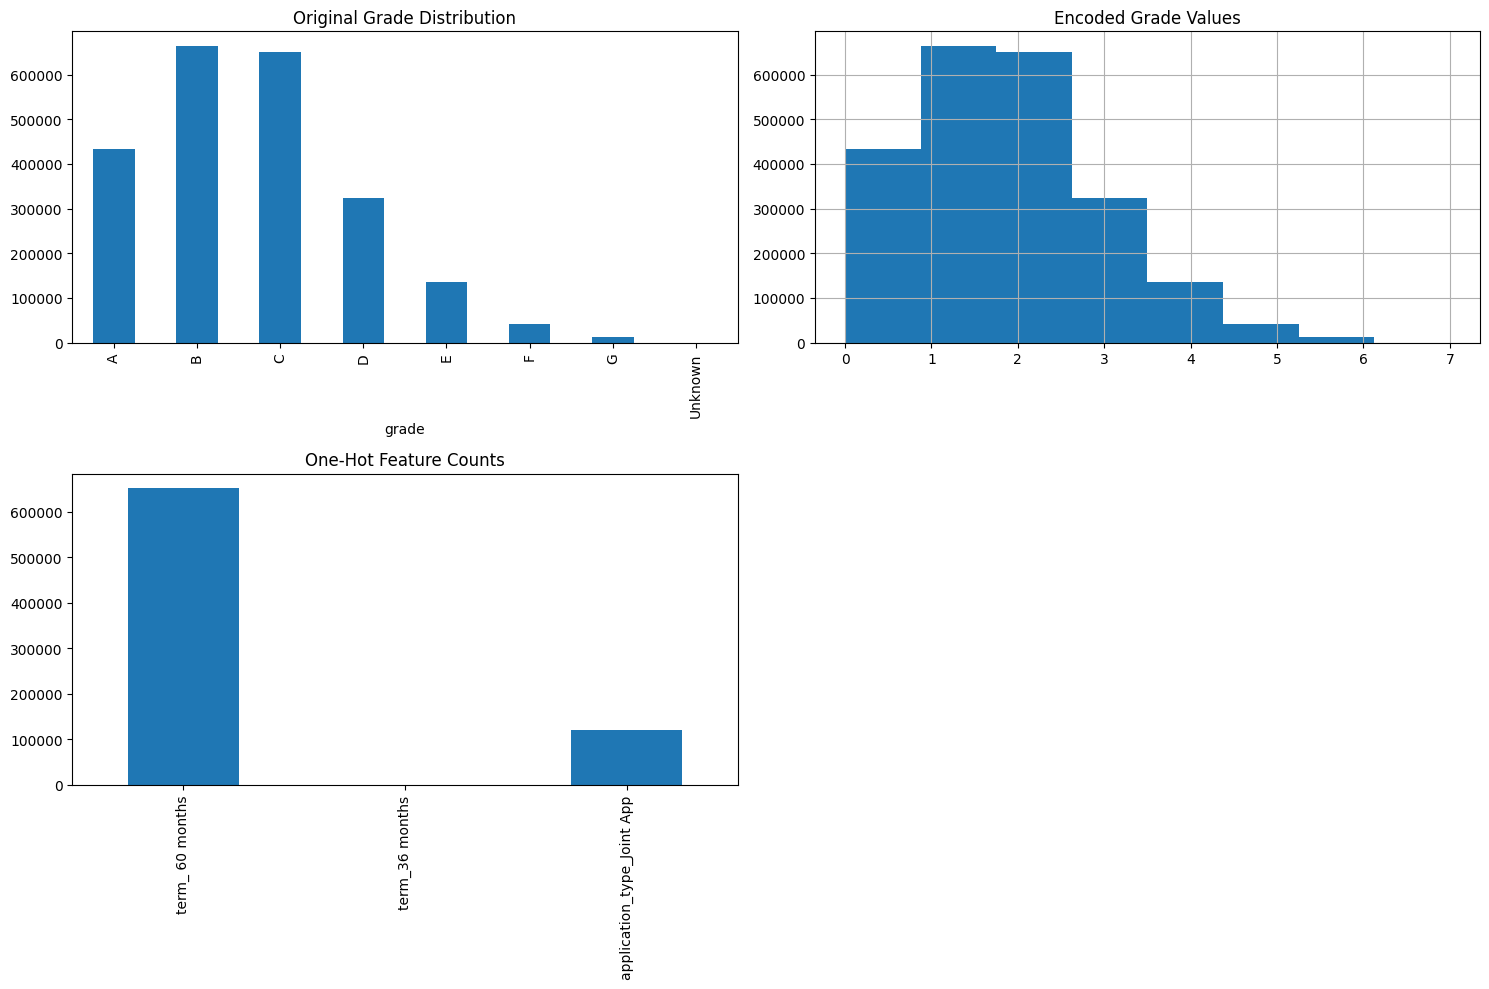


🔢 Final DataFrame Structure:


,last_fico_range_high,annual_inc,int_rate,loan_amnt,grade_encoded,term_ 60 months,term_36 months,application_type_Joint App
0,564.0,55000.0,13.99,3600.0,2.0,0.0,0.0,0.0
1,699.0,65000.0,11.99,24700.0,2.0,0.0,0.0,0.0
2,704.0,63000.0,10.78,20000.0,1.0,1.0,0.0,1.0


In [19]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from google.colab import drive
from IPython.display import display



# Select columns
categorical_cols = {
    'ordinal': ['grade'],  # Has inherent order (A-G)
    'onehot': ['term', 'application_type']  # No inherent order
}
numeric_cols = ['last_fico_range_high', 'annual_inc', 'int_rate', 'loan_amnt']  # Added loan_amnt
target_col = 'loan_status'

# Load Data
# df = pd.read_csv(DATA_PATH,
                 # usecols=categorical_cols['ordinal'] + categorical_cols['onehot'] + numeric_cols + [target_col],
                 # low_memory=False)

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv",
                 usecols=categorical_cols['ordinal'] + categorical_cols['onehot'] + numeric_cols + [target_col],
                 low_memory=False)

# Handle missing values
print("Missing values before treatment:")
print(df[categorical_cols['ordinal'] + categorical_cols['onehot']].isnull().sum())

# Categorical imputation
df['grade'] = df['grade'].fillna('Unknown')
df['term'] = df['term'].fillna('36 months')
df['application_type'] = df['application_type'].fillna('Individual')

# Store original values
original_values = df[categorical_cols['ordinal'] + categorical_cols['onehot']].copy()

# Encode categorical variables
# Ordinal encoding for grade
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']
df['grade_encoded'] = OrdinalEncoder(categories=[grade_order]).fit_transform(df[['grade']])

# One-hot encoding
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_data = onehot_encoder.fit_transform(df[categorical_cols['onehot']])
onehot_cols = onehot_encoder.get_feature_names_out(categorical_cols['onehot'])
onehot_df = pd.DataFrame(onehot_data, columns=onehot_cols)

# Create side-by-side comparison table
comparison_table = pd.concat([
    original_values,
    df['grade_encoded'].rename('grade_encoded'),
    onehot_df
], axis=1)

# Reorder columns for better comparison
column_order = [
    'grade', 'grade_encoded',
    'term', onehot_cols[0],
    'application_type', onehot_cols[1]
]
comparison_table = comparison_table[column_order]

# Display results
print("\n🟢 Original vs Encoded Values Comparison 🟢")
display(comparison_table.head())

print("\n🔢 Numeric Variables (NOT encoded):")
display(df[['loan_amnt', 'int_rate']].head())

print("\n📜 Encoding Scheme:")
print("- grade_encoded: A=0, B=1, C=2, D=3, E=4, F=5, G=6, Unknown=7")
print(f"- {onehot_cols[0]}: 1='60 months', 0='36 months'")
print(f"- {onehot_cols[1]}: 1='Joint', 0='Individual'")

# Create final dataframe (numeric + encoded)
final_df = pd.concat([
    df[numeric_cols],
    df['grade_encoded'],
    onehot_df
], axis=1)


# Visual verification
plt.figure(figsize=(15, 10))

# Original grade distribution
plt.subplot(2, 2, 1)
df['grade'].value_counts().sort_index().plot(kind='bar')
plt.title('Original Grade Distribution')

# Encoded grade distribution
plt.subplot(2, 2, 2)
final_df['grade_encoded'].hist(bins=len(grade_order))
plt.title('Encoded Grade Values')

# One-hot encoded features
plt.subplot(2, 2, 3)
final_df[onehot_cols].sum().plot(kind='bar')
plt.title('One-Hot Feature Counts')

plt.tight_layout()
plt.show()

print("\n🔢 Final DataFrame Structure:")
display(final_df.head(3))

**Section/ Task 5: Scaling Numerical Features: Implement scaling on numeric features to standardize their values.**

Original numeric values (first 5 rows):


,last_fico_range_high,annual_inc,int_rate,loan_amnt
0,564.0,55000.0,13.99,3600.0
1,699.0,65000.0,11.99,24700.0
2,704.0,63000.0,10.78,20000.0
3,679.0,110000.0,14.85,35000.0
4,704.0,104433.0,22.45,10400.0


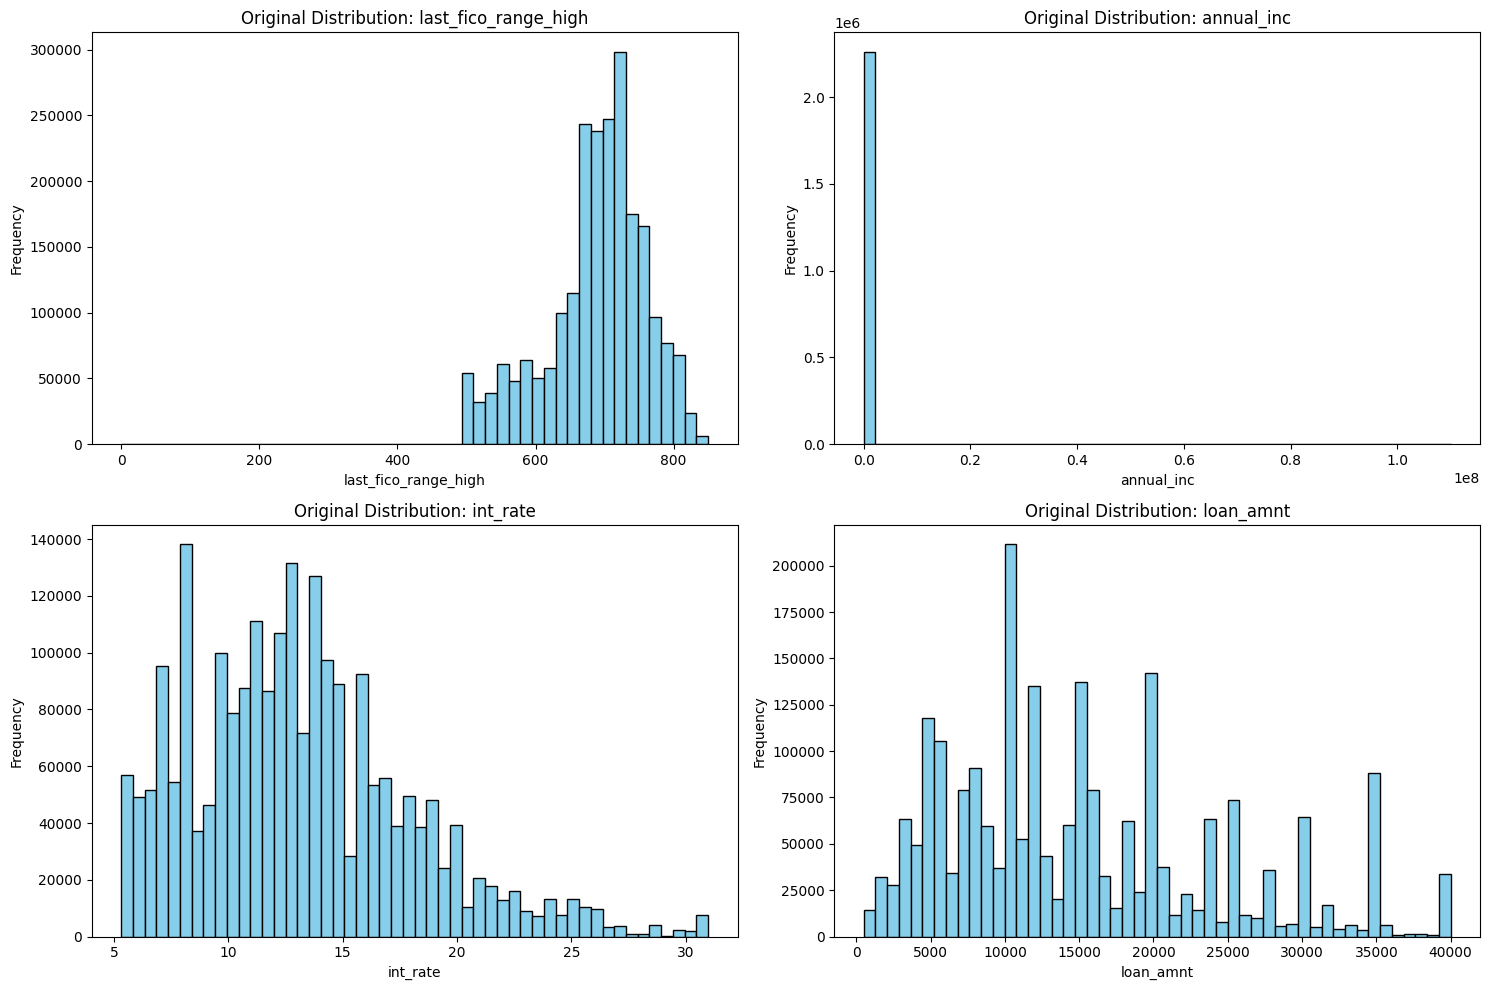

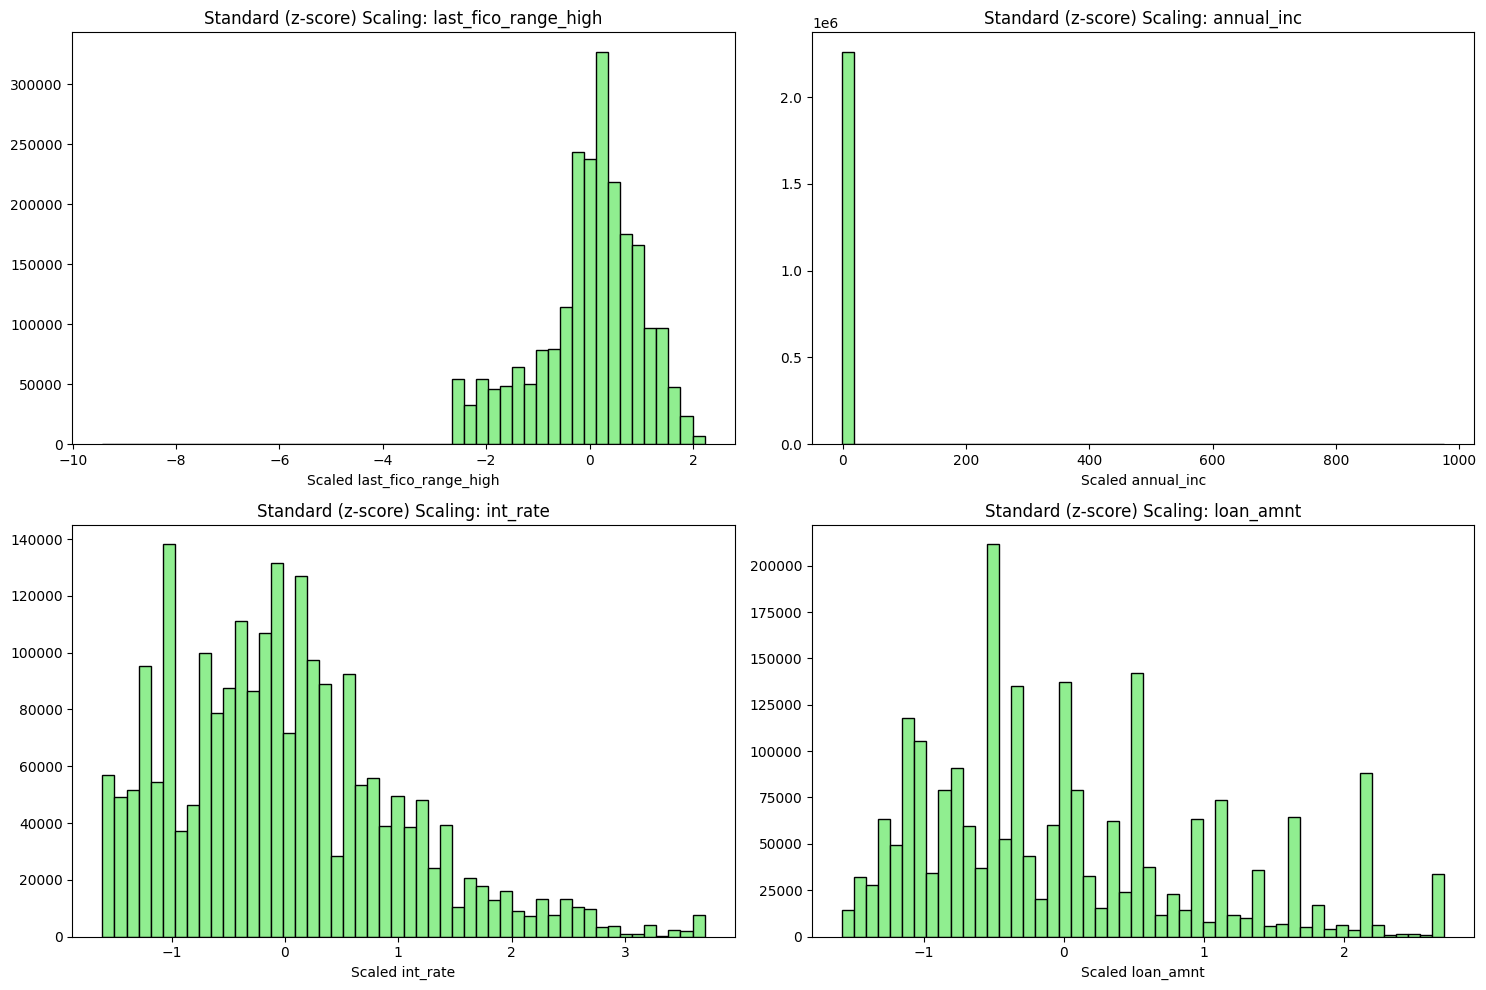

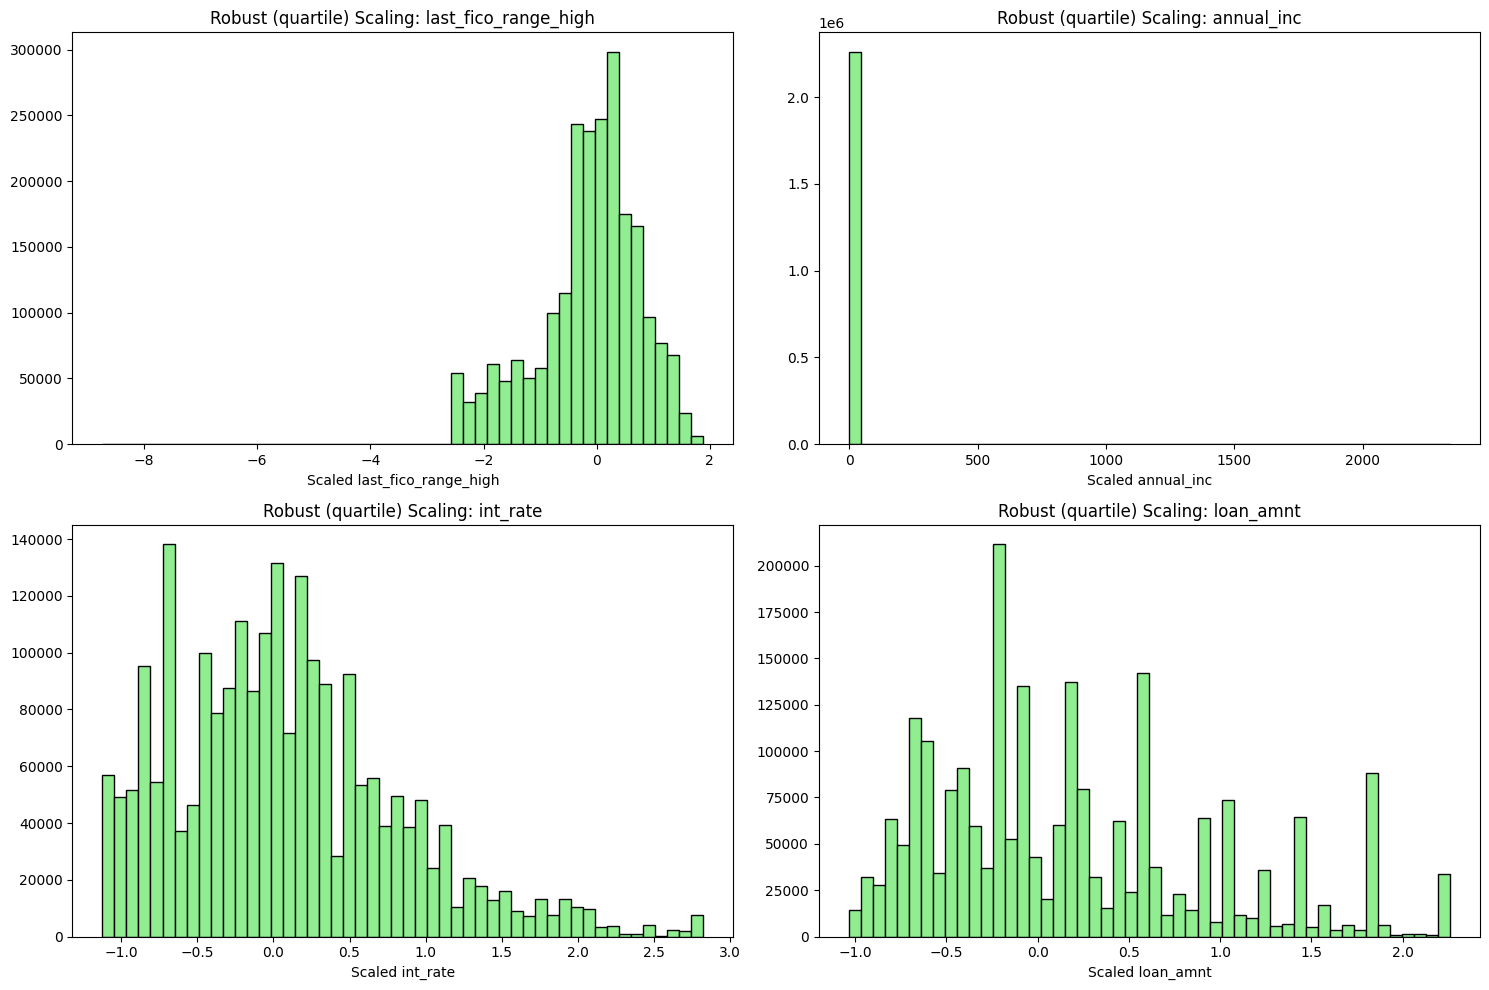

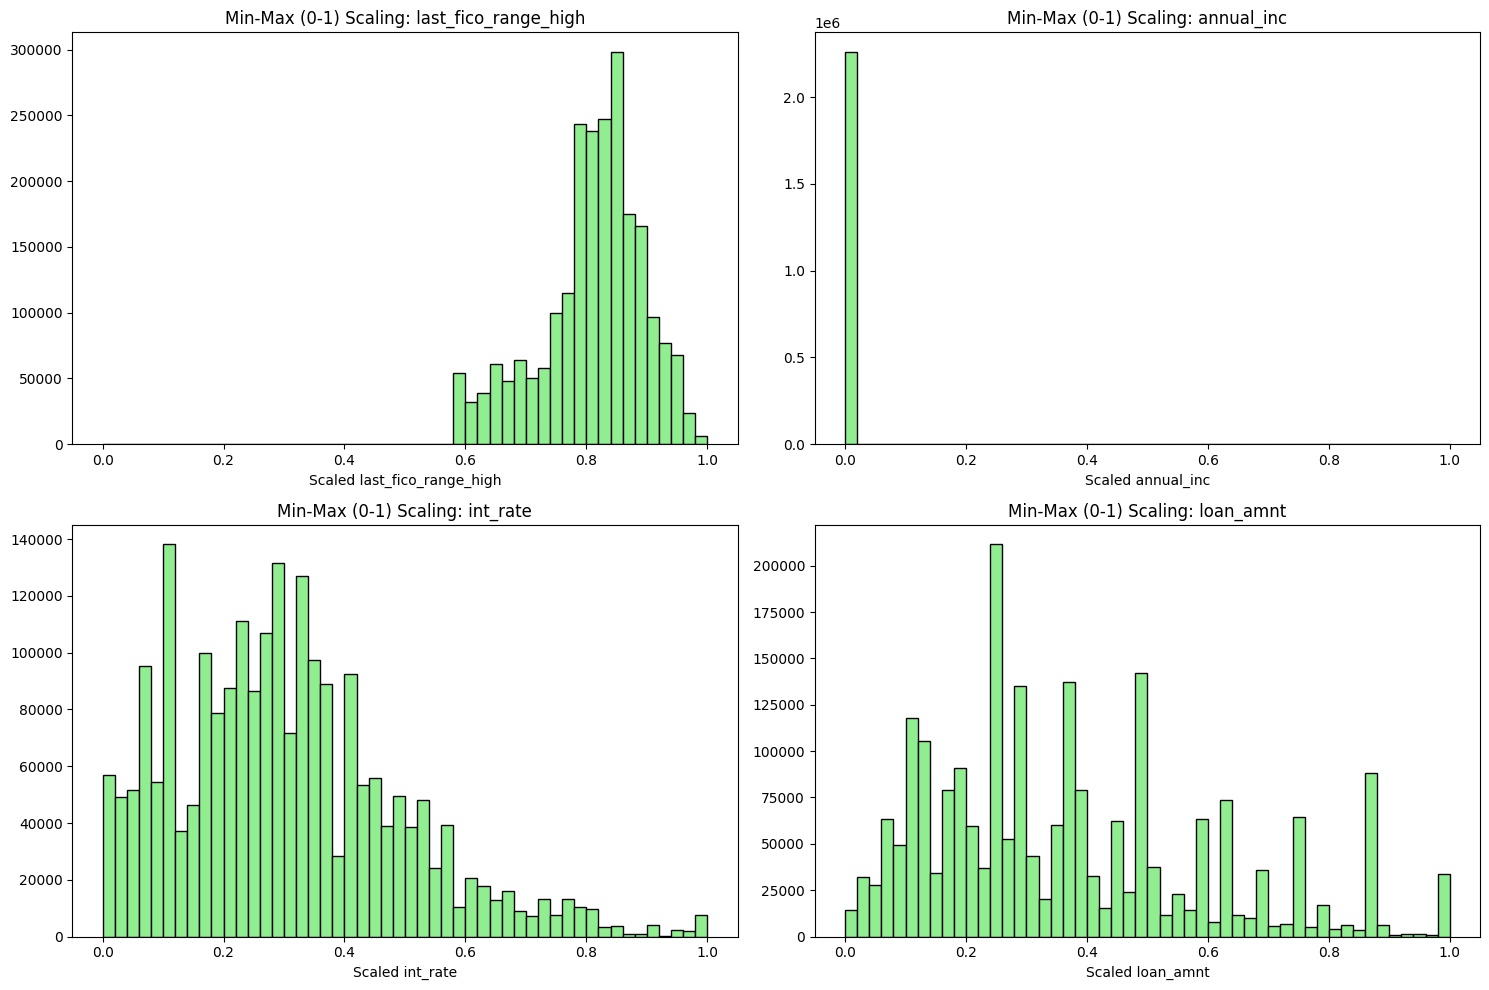

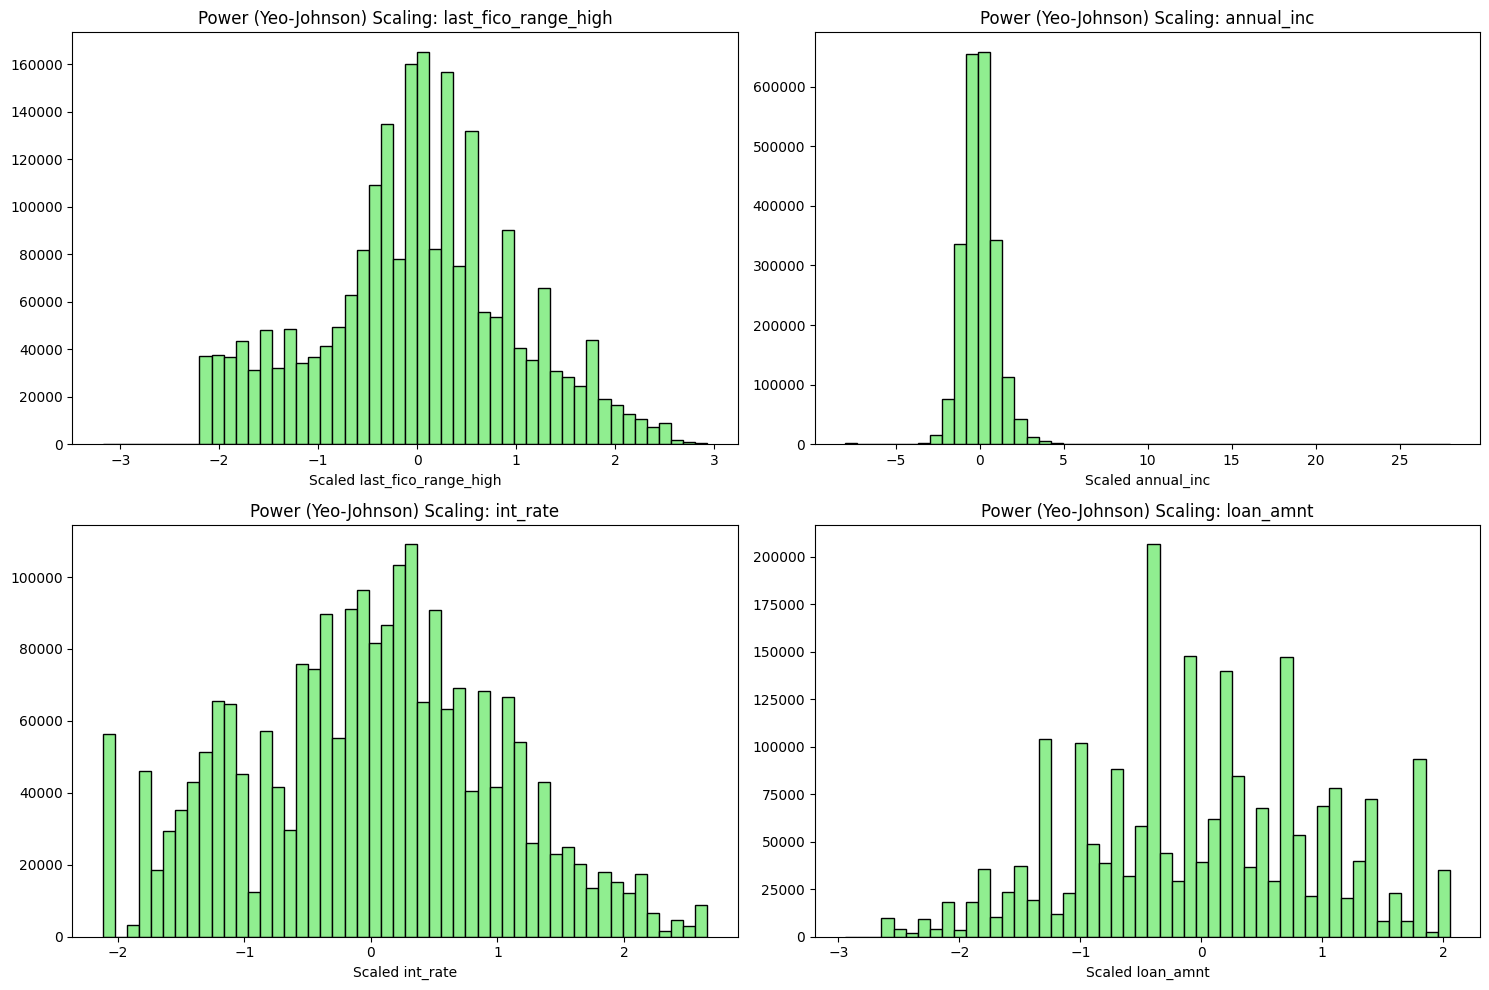


Scaled numeric values (z-scores):


,Standard (z-score)_last_fico_range_high,Standard (z-score)_annual_inc,Standard (z-score)_int_rate,Standard (z-score)_loan_amnt
0,-1.694687,-0.204021,0.185670,-1.245558
1,0.155391,-0.115286,-0.228228,1.050371
2,0.223912,-0.133033,-0.478637,0.538956
3,-0.118695,0.284021,0.363647,2.171133
4,0.223912,0.234622,1.936461,-0.505638



🔍 Original vs Scaled Values Comparison:


,last_fico_range_high,annual_inc,int_rate,loan_amnt,Standard (z-score)_last_fico_range_high,Standard (z-score)_annual_inc,Standard (z-score)_int_rate,Standard (z-score)_loan_amnt
0,564.0,55000.0,13.99,3600.0,-1.694687,-0.204021,0.185670,-1.245558
1,699.0,65000.0,11.99,24700.0,0.155391,-0.115286,-0.228228,1.050371
2,704.0,63000.0,10.78,20000.0,0.223912,-0.133033,-0.478637,0.538956
3,679.0,110000.0,14.85,35000.0,-0.118695,0.284021,0.363647,2.171133
4,704.0,104433.0,22.45,10400.0,0.223912,0.234622,1.936461,-0.505638



📊 Final DataFrame Structure:
Contains both original and scaled numeric features plus encoded categoricals


,last_fico_range_high,annual_inc,int_rate,loan_amnt,Standard (z-score)_last_fico_range_high,Standard (z-score)_annual_inc,Standard (z-score)_int_rate,Standard (z-score)_loan_amnt,grade_encoded,term_ 60 months,term_36 months,application_type_Joint App,loan_status
0,564.0,55000.0,13.99,3600.0,-1.694687,-0.204021,0.185670,-1.245558,2.0,0.0,0.0,0.0,Fully Paid
1,699.0,65000.0,11.99,24700.0,0.155391,-0.115286,-0.228228,1.050371,2.0,0.0,0.0,0.0,Fully Paid
2,704.0,63000.0,10.78,20000.0,0.223912,-0.133033,-0.478637,0.538956,1.0,1.0,0.0,1.0,Fully Paid
3,679.0,110000.0,14.85,35000.0,-0.118695,0.284021,0.363647,2.171133,2.0,1.0,0.0,0.0,Current
4,704.0,104433.0,22.45,10400.0,0.223912,0.234622,1.936461,-0.505638,5.0,1.0,0.0,0.0,Fully Paid



🔍 Column Definitions:
- Original numeric columns: [last_fico_range_high, annual_inc, int_rate, loan_amnt]
- Scaled numeric columns: [Standard (z-score)_last_fico_range_high, etc.]
- grade_encoded: 0=A, 1=B, ..., 6=G, 7=Unknown
- term_ 60 months: 1='60 months', 0='36 months'
- term_36 months: 1='Joint', 0='Individual'


In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, RobustScaler,
                                 MinMaxScaler, PowerTransformer)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from google.colab import drive
from IPython.display import display


# Select columns
categorical_cols = ['grade', 'term', 'application_type']
numeric_cols = ['last_fico_range_high', 'annual_inc', 'int_rate', 'loan_amnt']
target_col = 'loan_status'

# Load data
# df = pd.read_csv(
 #   file_path,
   # usecols=categorical_cols + numeric_cols + [target_col],
   # low_memory=False
# )

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv",
                 usecols=categorical_cols + numeric_cols + [target_col],
                 low_memory=False
                )


# Handle missing values
df['grade'] = df['grade'].fillna('Unknown')
df['term'] = df['term'].fillna('36 months')
df['application_type'] = df['application_type'].fillna('Individual')
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Show original numeric values
print("Original numeric values (first 5 rows):")
display(df[numeric_cols].head())

# Visualize original distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Original Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Initialize scalers
scalers = {
    'Standard (z-score)': StandardScaler(),
    'Robust (quartile)': RobustScaler(),
    'Min-Max (0-1)': MinMaxScaler(),
    'Power (Yeo-Johnson)': PowerTransformer(method='yeo-johnson')
}

# Apply and visualize scaling methods
scaling_results = {}
for name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(df[numeric_cols])
    scaling_results[name] = pd.DataFrame(scaled_data,
                                       columns=[f'{name}_{col}' for col in numeric_cols])

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, 2, i+1)
        plt.hist(scaling_results[name][f'{name}_{col}'], bins=50, color='lightgreen', edgecolor='black')
        plt.title(f'{name} Scaling: {col}')
        plt.xlabel(f'Scaled {col}')
    plt.tight_layout()
    plt.show()

# Show z-score scaled values (StandardScaler)
print("\nScaled numeric values (z-scores):")
display(scaling_results['Standard (z-score)'].head())

# Encode categorical variables
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']
df['grade_encoded'] = OrdinalEncoder(categories=[grade_order]).fit_transform(df[['grade']])

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_data = onehot_encoder.fit_transform(df[['term', 'application_type']])
onehot_cols = onehot_encoder.get_feature_names_out(['term', 'application_type'])

# Create comparison table of original vs scaled values
value_comparison = pd.concat([
    df[numeric_cols].head(),
    scaling_results['Standard (z-score)'].head()
], axis=1)

print("\n🔍 Original vs Scaled Values Comparison:")
display(value_comparison)

# Create final dataframe (using StandardScaler)
final_df = pd.concat([
    df[numeric_cols],                          # Original numeric values
    scaling_results['Standard (z-score)'],     # Scaled numeric values
    df['grade_encoded'],                       # Ordinal encoded grade
    pd.DataFrame(onehot_data, columns=onehot_cols),  # One-hot encoded
    df[[target_col]]                           # Target variable
], axis=1)

# Display final structure
print("\n📊 Final DataFrame Structure:")
print("Contains both original and scaled numeric features plus encoded categoricals")
display(final_df.head())

print("\n🔍 Column Definitions:")
print("- Original numeric columns: [last_fico_range_high, annual_inc, int_rate, loan_amnt]")
print("- Scaled numeric columns: [Standard (z-score)_last_fico_range_high, etc.]")
print("- grade_encoded: 0=A, 1=B, ..., 6=G, 7=Unknown")
print(f"- {onehot_cols[0]}: 1='60 months', 0='36 months'")
print(f"- {onehot_cols[1]}: 1='Joint', 0='Individual'")